# Определение успешности копмьютерных игр
**Цель проекта**  
Определение успешных компьютерных игр. Заказчик проекта - интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Нужно определить потенциально популярные продукты и спланировать рекламные кампании.  

**Имеющиеся данные**  
Из открытых источников доступны исторические данные:
- о продажах игр, 
- оценки пользователей и экспертов, 
- жанры и платформы (например, Xbox или PlayStation)
- объемы продаж игр по рынкам Северная Америка, Европа и Япония.  

**Ход исследования**  
- предобработка данных
- исследовательский анализ данных
- портрет пользователя (по платформам, жанрам, регинам и возрастному рейтингу)
- проверка гипотез.


## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

In [2]:
local_path = './'
server_path = '/datasets/'
file = 'games.csv'
try:
    data = pd.read_csv(f'{local_path}{file}')
except:
    data = pd.read_csv(f'{server_path}{file}')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Вывод


Методом info() получена общая информация по DataFrame.  
    
Пустые значения присутствуют в 5 из 11 столбцов.  
Строки без значений в столбцах "Name" и "Genre" можно просто удалить - их всего 2.  
В столбце "User_Score" целесообразно провести замену NaN нулями, с учетом дальнейшего приведения данных к числовому типу (float64)
и использования его и столбца "Critic_Score" в математических расчетах.    
Кроме этого в "User_Score" среди вариантов значения присутствует "tbd" - "to be determined" (будет определено).  
Это можно считать так же пропущенным значением и заменить нулем.
     
Пропуски в столбце "Rating" заполнить возможным не представляется. 
    
Названия столбцов для удобства дальнейшего использования целесообразно переименовать, убрав заглавные буквы.
    
Типы данные столбцов соответствуют, содержащимся в них данных. Исключение составляют:
- "Year_of_Release" - дата представлена числом, 
- "User_Score" - оценка представлена строкой.



## Предобработка данных

### Изменение названий столбцов

In [5]:
colmns = []
for col in data.columns:
    colmns.append(col.lower())
data.columns = colmns

### Изменение типов данных, обработка пропущенных значений

In [6]:
cols = ['user_score', 'critic_score', 'year_of_release']
for col in cols:
    data[col].fillna(value=0, inplace=True)
    
data.loc[data['user_score'] == 'tbd', 'user_score'] = 0

In [7]:
data = data.astype({'year_of_release':'int64', 'user_score':'float64'})

In [8]:
data = data.loc[data['name'].isnull() == 0]

Пропущенные значения в столбцах 'user_score', 'critic_score' и 'year_of_release' заменены нулями. Чтобы не создавать дополнительных столбцов в методе fillna() использован атрибут inplace == True. 
Причинами появления пропусков можно считать ошибки при внесении данных в БД, либо отсутствие этих данных.    

Для замены текстового пропуска 'tbd' применена логичсеская индексация по условию. Причиной появления такого значения можно предлопожить "отложенное заполнение" к которому позднее не вернулись либо за отсутвием данных, либо забыли.
    
Из выборки удалены 2 строки с отсутствующим названием игры, полезность их нулевая, на общий срез их удаление никак не повлияет.   


### Удаление дубликатов

In [9]:
data.duplicated().sum()

0


Проведена проверка на наличие дубликатов, они отсутствуют.


### Расчет суммарных продаж во всем регионах

In [10]:
data['total_sales'] = data.loc[:,'na_sales':'other_sales'].sum(axis=1)

### Вывод

 
Проведена предобработка данных, данные приведены к нужным типам, заполнены пропуски, создан столбец с суммарными продажами по всем регионам.


## Исследовательский анализ данных

### Выпуск игр по годам

In [11]:
group_years = data.groupby('year_of_release').agg({'name':'count'})

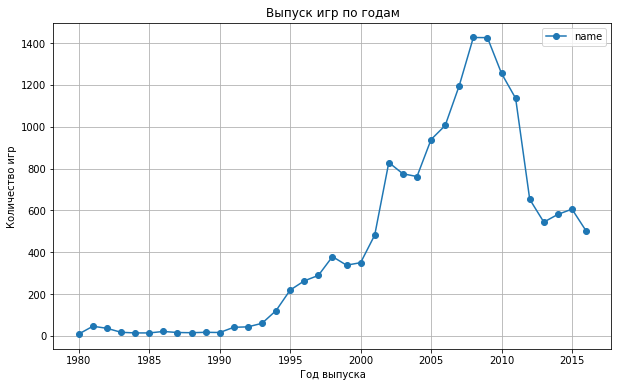

In [12]:
group_years.loc[group_years.index != 0].plot(
    style='o-', 
    grid=True, 
    figsize=(10,6), 
    title='Выпуск игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

In [13]:
group_years['share'] = group_years / len(data)
group_years['cum_share'] = group_years['share'].cumsum()

In [14]:
group_years

,name,share,cum_share
year_of_release,,,
0,269,0.016095,0.016095
1980,9,0.000539,0.016634
1981,46,0.002752,0.019386
1982,36,0.002154,0.021540
1983,17,0.001017,0.022557
1984,14,0.000838,0.023395
1985,14,0.000838,0.024233
1986,21,0.001257,0.025489
1987,16,0.000957,0.026446


В DF представлены данные с 1980 по 2016 гг., при этом у 269 игр год выпуска не указан вовсе.  
Для прогноза на 2017 г. актуальной будет информация для игр выпуска не позднее 2007 года (10 лет).   

Принимая за период развития и уход с рынка платформ 7-8 лет выбранный период выпуска игр оптимален.
    
Данные до 2007 года будут исключены из DF для дальнейшего анализа. От первоначальной выборки останется порядка 50% данных.


### Продажа игр по платформам

In [15]:
# удалим данные по играм старше 2007 выпуска
data_corr = data.query('year_of_release >= 2007')

In [16]:
group_platform = data_corr.pivot_table(
    index='platform', 
    values='total_sales', 
    aggfunc='sum').sort_values(
    by='total_sales', 
    ascending=False)

In [17]:
top_platforms = group_platform.head(10)
top_platforms

,total_sales
platform,
PS3,910.38
X360,901.37
Wii,754.03
DS,535.54
PS4,314.14
3DS,257.81
PSP,183.31
PS2,162.38
PC,160.57


In [18]:
group_platform_year = data_corr.pivot_table(
    index=['platform', 'year_of_release'], 
    values='total_sales', 
    aggfunc='sum').reset_index(level=1)

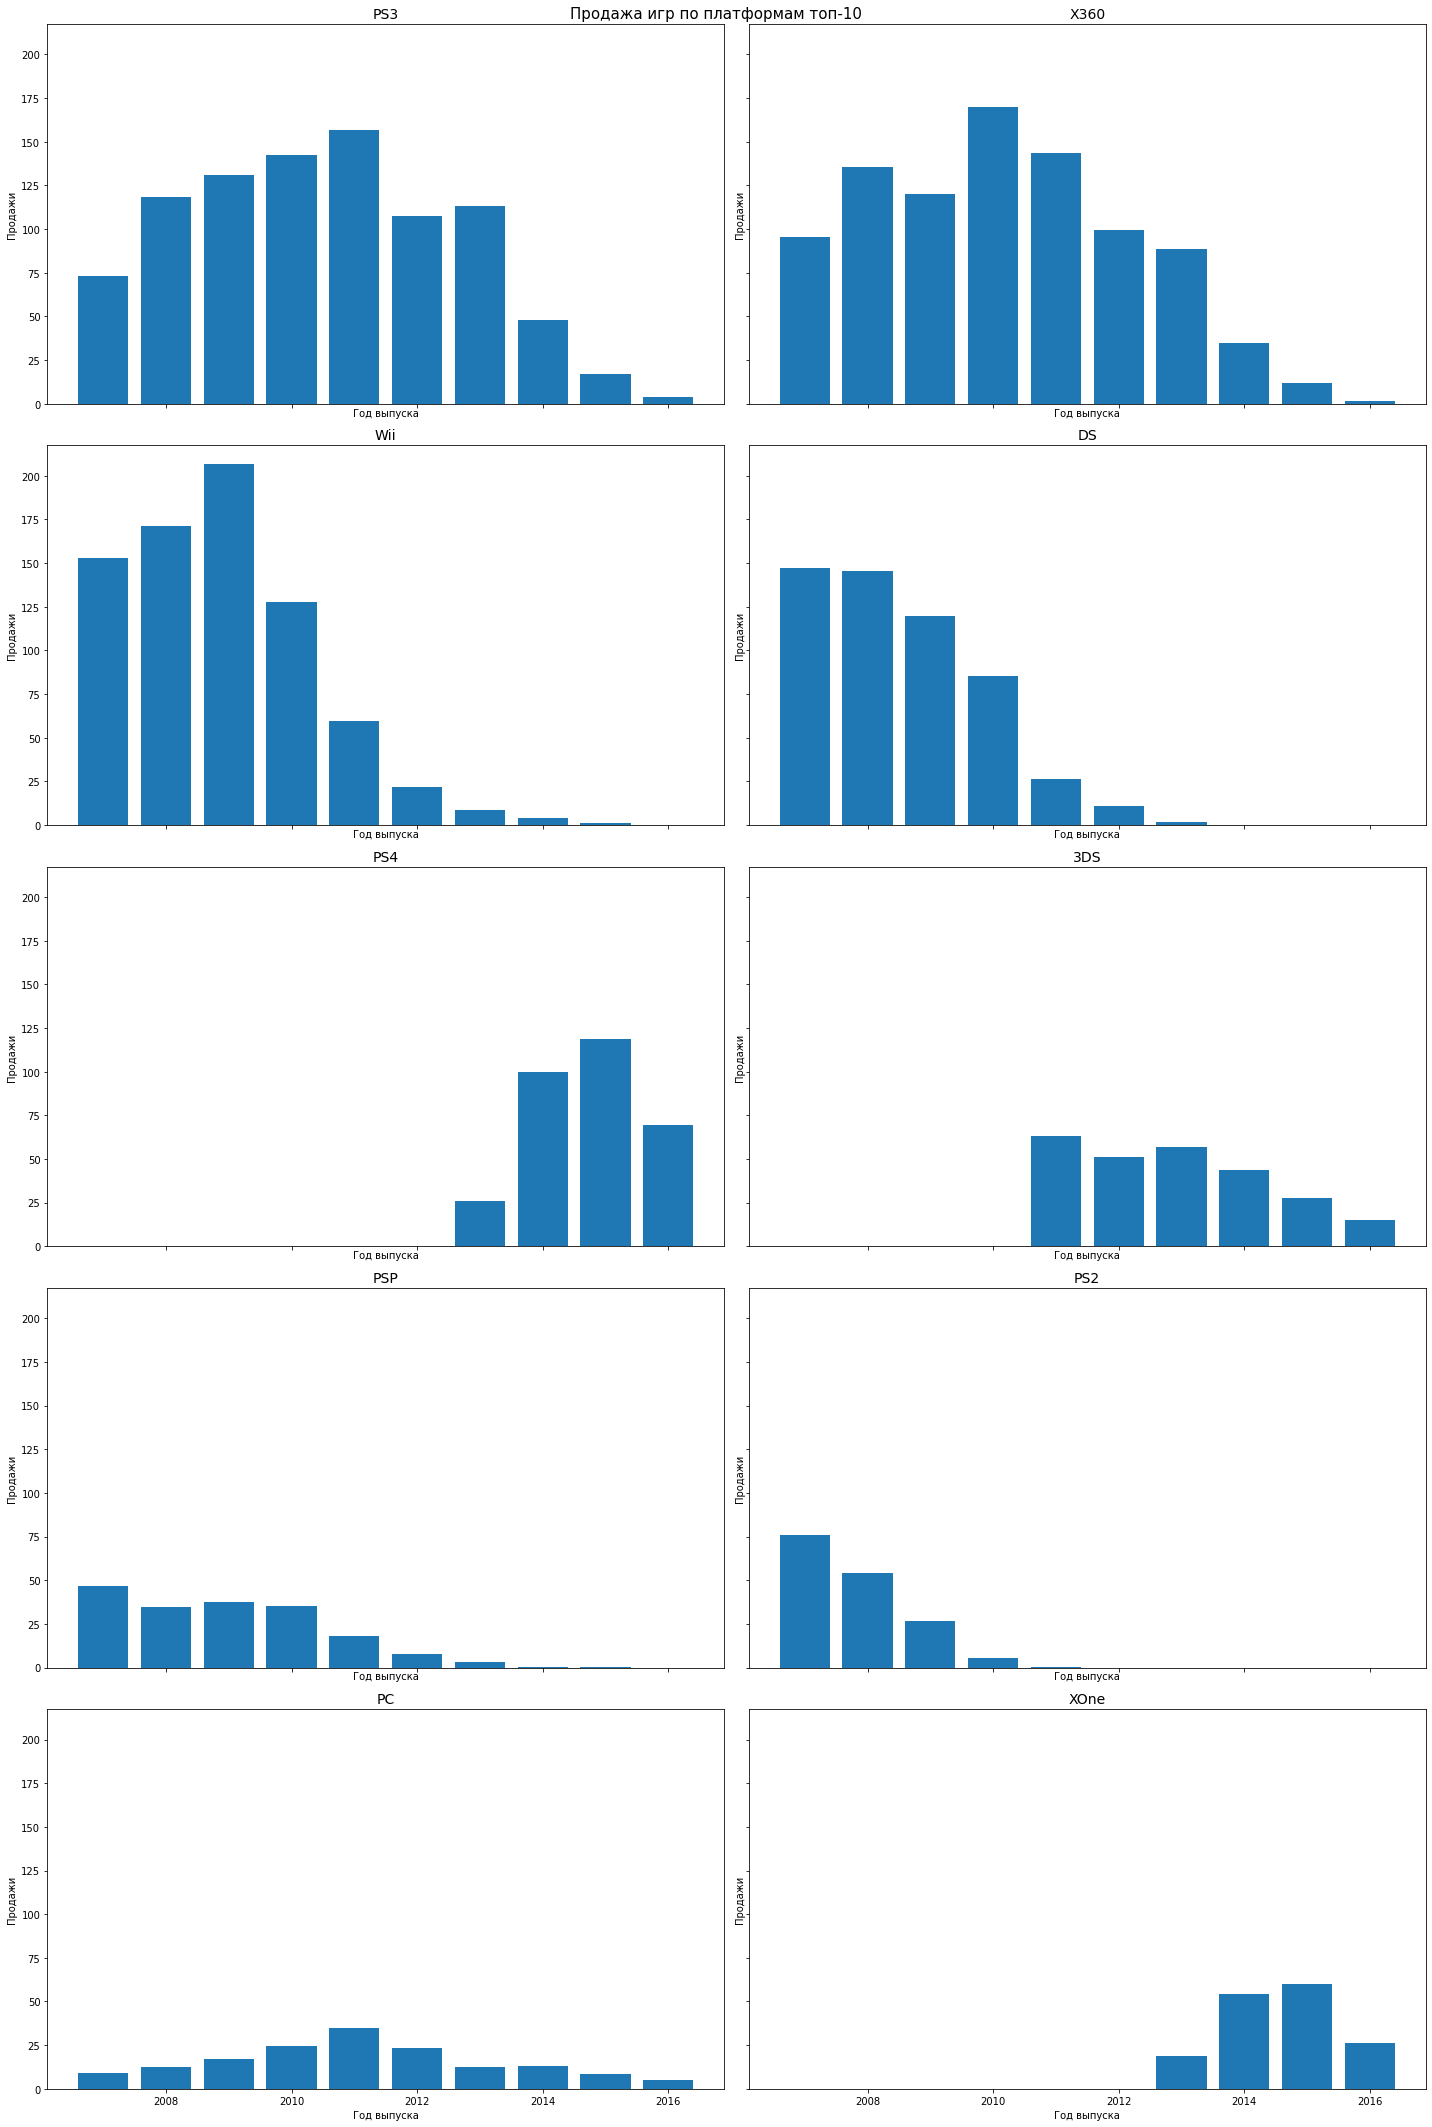

In [19]:
top_platforms_names = top_platforms.index.to_list()

num_c = 2
num_r = len(top_platforms_names)//2

fig, ax = plt.subplots(
    nrows=num_r,
    ncols=num_c,
    figsize=(20, 30),
    sharey=True,
    sharex=True
    
)

fig.suptitle(
    'Продажа игр по платформам топ-10', 
    fontsize = 15,
    va='center'
)

for plat in top_platforms_names:
    row = top_platforms_names.index(plat) // num_c
    col = top_platforms_names.index(plat) % num_c
    ax[row, col].bar(
        x = group_platform_year.loc[plat]['year_of_release'],
        height = group_platform_year.loc[plat]['total_sales'],

    )

    ax[row, col].set_title(plat, fontsize = 14)
    ax[row, col].set_xlabel('Год выпуска')
    ax[row, col].set_ylabel('Продажи')

plt.tight_layout()  

 
После очистки данных от неактуальных показателей сделан срез по платформам.
    
Для анализа применен графический метод - построение столбчатых диаграмм по годам и сумме общих продаж для топ-10 по объему полученной выручки платформ.

Выводы можно сделать следующие:
- PS3, X360 и WII к 2016 году значительно снизили показатели по выручке. Платформы находятся на завершающем этапе жизненного цикла.
- DS, PSP и PS2 к 2016 уже полностью ушли с рынка, хотя ранее показывали хорошие продажи.
- PS4 в 2016 году снизили объем выручки по сравнению с 2015 г почти в два раза, но платформа на рынке только 4 года, можно предположить рост продаж в 2017
- аналогично ситуация обстоит с XOne - платформа на рынке 4 года, но выручка 2016 гораздо ниже 2015 года    
- 3DS c 2014 года показывает устойчивый тренд на снижение объемов выручки, можно предположить что в 2017 снижение продолжится.
- PC замыкает топ-10 по объему выручки, в 2016 продолжился тренд на снижение.   
    
Потенциально прибыльными платформами на 2017 г будем считать PS4, XOne т.к. они имеют "запас" жизненного цикла, а также 3DS и PC - несмотря на снижение, объемы продаж существенные. 

### Построение диаграмм размаха по платформам

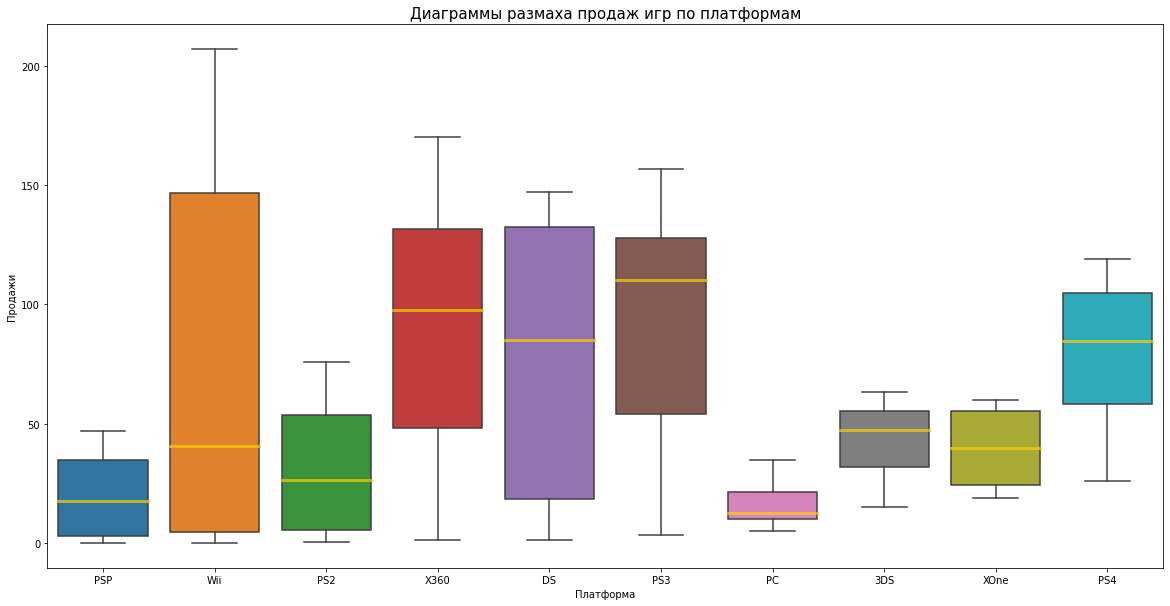

In [20]:
plt.figure(figsize=(20,10),)
sns.boxplot(
    data = group_platform_year.query(
        'platform in @top_platforms_names').reset_index().sort_values(
        by='total_sales',),
    y='total_sales',
    x='platform',
     medianprops=dict(color="#f7cf05", alpha=.7, linewidth=3)

)
plt.title('Диаграммы размаха продаж игр по платформам', size=15)
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()


Построение boxplot по суммарным продажам в разрее платформ позволяет определить распределение их значений.
На основании графиков можно сделать следующие:
- PSP и PS2 имеют схожие распределения - медиана смещена вниз к первому квартилю, большая часть значений лежит выше медианы,
- WII медиана смещена вниз к первому квартилю, большая часть значений лежит выше медианы,  
- X360 медиана незначительно выше среднего, значения распределены относительно равномерно,
- PS3 медиана смещена вверх к третьему квартилю, большая часть значений лежит ниже медианы, 
- DS медиана незначительно выше среднего, значения распределены относительно равномерно,
- PS4 медиана незначительно выше среднего, значения распределены относительно равномерно, но с преобладанием значений в нижней части,
- 3DS медиана смещена вверх к третьему квартилю, большая часть значений лежит ниже медианы,
- PC медиана смещена вниз к первому квартилю, большая часть значений лежит выше медианы, верхний "ус" значительно длинее нижнего,
- XOne медиана примерно равна среднему, график выглядит практически симметрично относительно середины, распределения значений небольшие. 


### Корреляция отзывов и продаж игр на платформах "PS4", "XOne", "PC" и "3DS"

Ранее были обозначены потенциально прибыльные платформы на 2017: PS4, XOne, DS и PC.  
Проведем более глубокий анализ по ним.

In [21]:
# функция для отбора данных по платформе
def get_data_stat(df, platform):
    colmns = ['total_sales', 'user_score', 'critic_score']
    data_stat = df.query('platform == @platform and critic_score !=0 and user_score !=0'
                        ).reset_index(drop=True)
    return data_stat[colmns]

In [22]:
top_4_platform = ["PS4", "XOne", "PC", "3DS"]

for p in top_4_platform:
    exec(f'data_stat_{p.lower()} = get_data_stat(data_corr, p)')

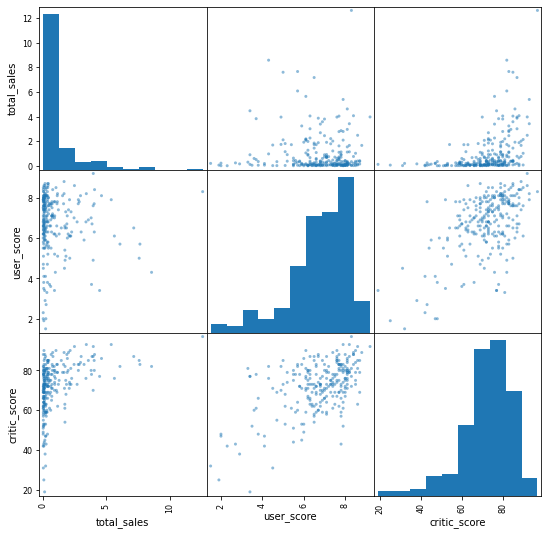

In [23]:
#проанализируем ключевые показатели по наиболее перспективной платформе PS4
pd.plotting.scatter_matrix(data_stat_ps4, figsize=(9, 9)) 
plt.show()


При попарном сравнении распределений показателей столбцов 'total_sales', 'user_score' и 'critic_score' продаж игр на платформе PS4 можно заметить следующее:
- гистограмма распределения по сумме выручки в таком разрезе значительных колебаний не имеет, пик приходит на значения 0-1 млн.копий
- значения отзывов пользователей и продажи связаны достаточно тесно на уровне оценки 6-8, в остальных значениях присутствует разброс данных
- аналогичным образом продажи связаны с оценками экспертов, тесная взаимосвязь на уровне оценки 60-80, в остальных значениях широкий разброс.
- гистограмма пользовательских оценок показывает пик на уровне 8, встречаемость оценки 6-7 следующая по частоте.
- гистограмма экспертных оценок показывает пик на уровне 80, немного меньшая частота 70, оценки больше 80 и менее 70 представлены реже.
- значения пользовательских и экспертных оценок связаны слабо, заметен сильный разброс данных.


Посмотрим далее подробнее взамосвязь оценок игры с ее суммарными продажами. Срез сделаем по топ-4 плаформ.  
Для этого расчитаем корреляцию показателей и построим тепловые карты взаимосвязи анализируемых показателей для визуализации полученой информации 

In [24]:
# функция создания для тепловой карты по показателям суммарные продажи и оценки пользователей / экспертов
# дополнительный срез по платформе

def get_heatmap(df, platform):
    df['total_sales'] = df['total_sales'].round(2)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6), )
    fig.suptitle(f'Взаимосвязь суммарных продаж на платформе {platform} \nс оценками пользователей и экспертов',
                fontsize=14)

    ax1 = plt.subplot(121, xlabel='').set_title('Оценки пользователей')
    sns.heatmap(
        df.pivot_table('user_score',  'total_sales', ),
        xticklabels=False,
        cmap='autumn'
    )

    ax2 = plt.subplot(122, xlabel='').set_title('Оценки экспертов')
    ax2 = sns.heatmap(
        df.pivot_table('critic_score', 'total_sales', ),
        xticklabels=False,
        cmap='autumn'
    )
    plt.show()

In [25]:
data_stat_ps4.corr()

,total_sales,user_score,critic_score
total_sales,1.000000,-0.033625,0.405895
user_score,-0.033625,1.000000,0.557654
critic_score,0.405895,0.557654,1.000000


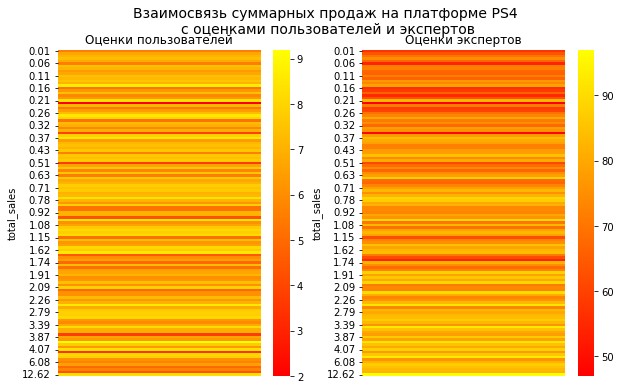

In [26]:
get_heatmap(data_stat_ps4, 'PS4')

На тепловой карте игр на **платформе PS4** хорошо заметна тесная взаимосвязь показателей "оценка экспертов" и "суммарные продажи" - чем выше один показатель тем выше и другой. Взамосвязь "оценка пользователей" и "суммарные продажи" менее выражена - встречаются низкие оценки коммерчески успешных игр и высокие оценки игр с небольшими продажами.  
Минимальная оценка экспертов 50 из 100, пользователей 2 из 10. Максимальные значения близки к своим пределам (100 и 10 соответственно).

In [27]:
data_stat_xone.corr()

,total_sales,user_score,critic_score
total_sales,1.000000,-0.094003,0.410422
user_score,-0.094003,1.000000,0.472462
critic_score,0.410422,0.472462,1.000000


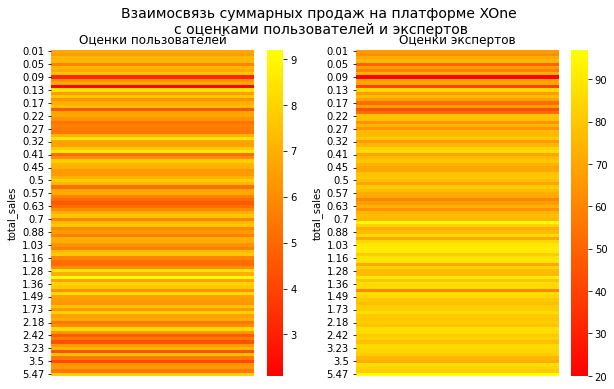

In [28]:
get_heatmap(data_stat_xone, 'XOne')

На тепловой карте игр на **платформе XOne** еще более отчетливо заметна тесная взаимосвязь показателей "оценка экспертов" и "суммарные продажи" - чем выше один показатель тем выше и другой. Взамосвязь "оценка пользователей" и "суммарные продажи" менее выражена - встречаются низкие оценки коммерчески успешных игр и высокие оценки игр с небольшими продажами.  
Минимальная оценка экспертов 20 из 100, что существенно ниже минимальной оценки на платформе PS4. При этом минимальная оценка пользователей близка по значению к платформе PS4. Максимальные значения также близки к своим пределам.

In [29]:
data_stat_pc.corr()

,total_sales,user_score,critic_score
total_sales,1.000000,-0.008355,0.298107
user_score,-0.008355,1.000000,0.518416
critic_score,0.298107,0.518416,1.000000


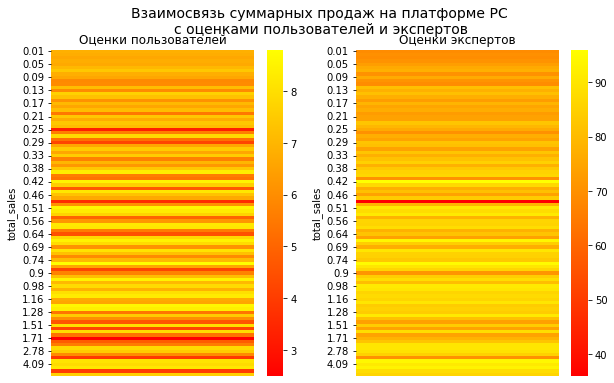

In [30]:
get_heatmap(data_stat_pc, 'PC')

На тепловой карте игр на **платформе PC** хорошо заметна тесная взаимосвязь показателей "оценка экспертов" и "суммарные продажи" - чем выше один показатель тем выше и другой. Взамосвязь "оценка пользователей" и "суммарные продажи" менее выражена. Достаточно много низких оценок (2-4) коммерчески успешных игр (суммарные продажи свыше 0,5) и высокие оценки игр (7-8) с небольшими продажами (менее 0,2).  
Минимальная оценка экспертов 40 из 100, это ближе к показателю минимальной оценки на платформе PS4. Максимальное значение пользовательской оценки ближе к 9 - можно сказать, что пользователи этой платформы не склонны ставить наивысший бал.  Максимальные экспертные оценки близки к 100.

In [31]:
data_stat_3ds.corr()

,total_sales,user_score,critic_score
total_sales,1.000000,0.232089,0.338904
user_score,0.232089,1.000000,0.745222
critic_score,0.338904,0.745222,1.000000


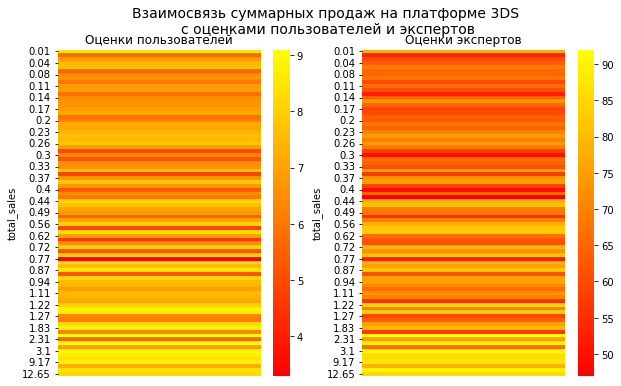

In [32]:
get_heatmap(data_stat_3ds, '3DS')

На тепловой карте игр на **платформе 3DS** менее заметна взаимосвязь показателей "оценка экспертов" и "суммарные продажи" - чем выше один показатель тем выше и другой. Взамосвязь "оценка пользователей" и "суммарные продажи" более выражена. Оценки экспертов представлены в основном значениями 50-75 на всех уровнях продаж, максимальные баллы (свыше 80) заметны в осном у самых успешных игр (продажи свыше 1,2).  
Пользовательские оценки в целом нарастают с ростом продаж игры, однако встречаются и  исключения (оценки ниже 5 у игр с продажами выше среднего).
Минимальная оценка экспертов 50 из 100 и пользователей 4 из 10, это приближено к минимальным оценкам на платформе PS4. Максимальные оценки также близки к показателям платформы PS4.

Если оценивать коэффициент корреляции выручка/экспертная оценка и выручка/пользовательская оценка с помощью метода corr() получаем следующие данные:      
- для платформ PS4, XOne и PC коэффициенты достаточно близки:
    - выручка/экспертная оценка представлена значениями 0,405 0,410 0,298 (при увеличении оценки растет выручка)
    - выручка/пользовательская оценка -0,034 -0,094, -0,008 (при увеличении оценки снижается выручка, судя по коэффициенту правда незначительно)
    - экспертная оценка / пользовательская оценка 0,557 0,472 0,518 (при увеличении одной растет и вторая)
- для платформы 3DS ситуация выглядит несколько иначе:
    - выручка/экспертная оценка коэффициент Пуассона 0,338 и выручка/пользовательская оценка коэффициент Пуассона 0,232 (линейная зависимость второго показателя противоположна другим платформам и связь при этом более тесная)
    - а вот экспертная оценка / пользовательская оценка связаны более тесно 0,745.

### Анализ прибыльности игр по жанрам

In [33]:
group_genres = data_corr.pivot_table(index='genre', 
                                     values='total_sales', 
                                     aggfunc=['sum', 'mean', 'median'])
group_genres

,sum,mean,median
,total_sales,total_sales,total_sales
genre,,,
Action,1050.59,0.477975,0.170
Adventure,129.99,0.136544,0.040
Fighting,166.00,0.463687,0.160
Misc,487.89,0.426105,0.140
Platform,230.45,0.805769,0.245
Puzzle,79.18,0.245139,0.090
Racing,265.19,0.544538,0.170
Role-Playing,465.03,0.524865,0.150



В разрезе жанров наибольшую сумму общей выручки принесли игры Action, Shooter и Sports.  
Если анализировать медианную стоимость 1 игры, наиболее прибыльные игры Shooter, Platform, Action и Racing.
Таким образом можно сделать вывод, что наиболее прибыльные и при этом продающиеся в больших объемах жанры это Shooter и Action.  
Наименьшие объемы суммарных продаж у Puzzle и Strategy.


## Портрет пользователя каждого региона (NA, EU, JP)

### Самые популярные платформы (топ-5) по регионам

In [34]:
# напишем функцию для получения данных в разрезе региона и дополнительной характеристики
def get_info_area(df, col, dim):
    df_region = df.pivot_table(index=dim,
                               values=col, 
                               aggfunc='sum'
                              ).sort_values(by=col, 
                                            ascending=False)
    df_region.columns = ['sales']
    df_region['share'] = (df_region['sales'] / df_region['sales'].sum()).round(2)
    
    return df_region

In [35]:
group_na_plat = get_info_area(data_corr, 'na_sales', 'platform')
group_eu_plat = get_info_area(data_corr, 'eu_sales', 'platform')
group_jp_plat = get_info_area(data_corr, 'jp_sales', 'platform')

In [36]:
# функция для построения круговой диаграммы в разрезе региона и дополнительной характеристики
def get_pie(df, sales, region, dim, ax):
    
    top_5 = df.head().index
    
    df['group_name'] = (df.index.where(df.index.isin(top_5), 'Другие'))

    df.pivot_table(
        index='group_name', 
        values=sales, 
        aggfunc='sum').sort_values(by=sales,
                                  ascending=False).plot.pie(
        y=sales, 
        autopct='%1.1f%%',
        legend=False,
        startangle=110,
        colors=['#f5ed0c', '#f76539', '#88fa6b', '#0b74bf', '#d689fa', '#afdbfa'],
        ax=ax,
            )

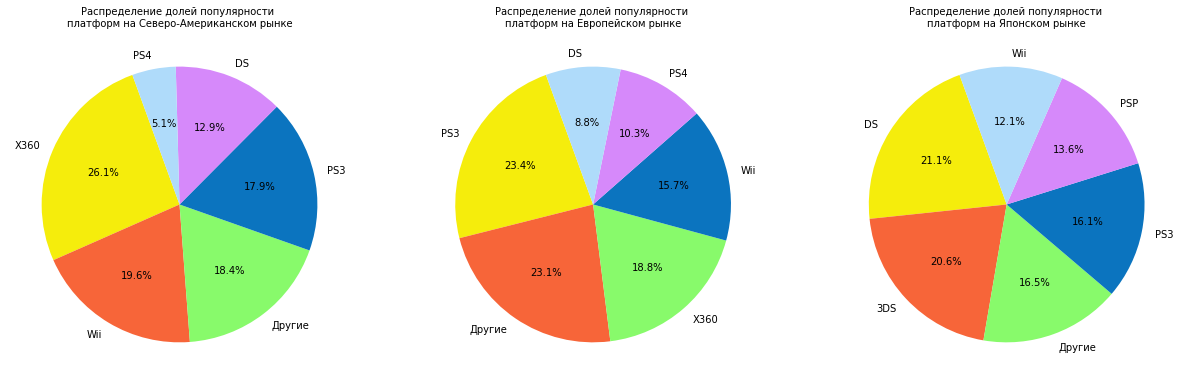

In [37]:
col = 'sales'
dimension = 'платформ'
regions = {'group_na_plat'
           :'Северо-Американском', 'group_eu_plat':'Европейском', 'group_jp_plat':'Японском'}
fig, ax = plt.subplots(1,3, figsize=(21, 7))

for i in range(3):
    get_pie(
        locals().get(list(regions.keys())[i]), 
        col, 
        regions[list(regions.keys())[i]], 
        dimension,
        ax[i]
    )
    ax[i].set_ylabel('')
    ax[i].set_title(f'Распределение долей популярности \n{dimension} на {regions[list(regions.keys())[i]]} рынке', 
                    size=10)


В *Северо-Американском* регионе топ-5 платформ выглядит следующим образом:
- возглавляет X360 - 26% от всего числа продаж по региону, 
- на втором месте Wii - 20% продаж 
- PS3 на третьем с 18% суммарных продаж
- DS на четвертом месте - 13% продаж по региону
- PS4 на пятом месте с 5% по региону.
    
В *Европе* в топ-5 отличается только по распределенным долям:
- возглавляет PS3 - 23% от числа продаж по региону, 
- на втором месте X360 - 19% продаж 
- Wii на третьем с 16% суммарных продаж
- PS4 на четвертом месте - 10% продаж по региону
- DS на пятом месте с 9% по региону.
    
*Японский* рынок отличается и по составу и по долям, от Северо-Американского и Европейского рынков:
- возглавляет топ DS - 21% от числа продаж по региону, 
- на втором месте с небольшим отличием 3DS так же 21% продаж 
- PS3 на третьем с 16% суммарных продаж
- PSP на четвертом месте - 14% продаж по региону
- Wii на пятом месте с 12% по региону
    
</div>

### Самые популярные жанры (топ-5) по регионам

In [38]:
group_na_genre = get_info_area(data_corr, 'na_sales', 'genre')
group_eu_genre = get_info_area(data_corr, 'eu_sales', 'genre')
group_jp_genre = get_info_area(data_corr, 'jp_sales', 'genre')

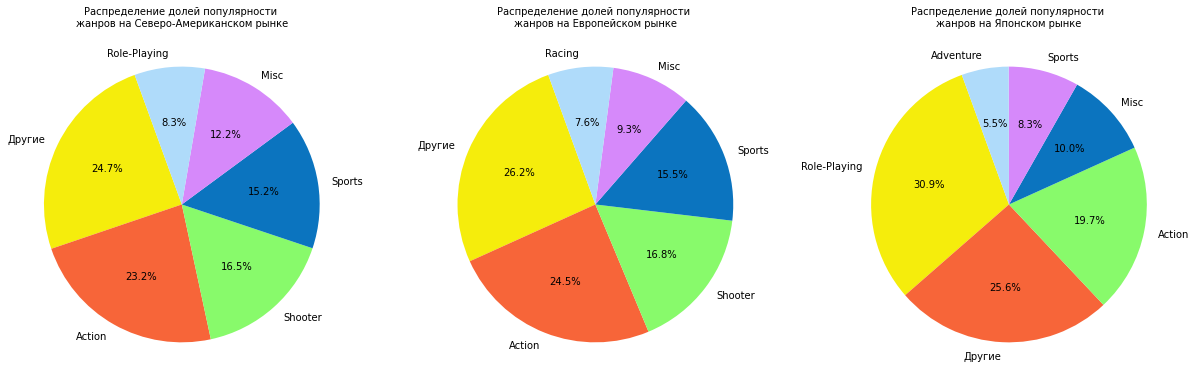

In [39]:
col = 'sales'
dimension = 'жанров'
regions = {'group_na_genre'
           :'Северо-Американском', 'group_eu_genre':'Европейском', 'group_jp_genre':'Японском'}
fig, ax = plt.subplots(1,3, figsize=(21, 7))

for i in range(3):
    get_pie(
        locals().get(list(regions.keys())[i]), 
        col, 
        regions[list(regions.keys())[i]], 
        dimension,
        ax[i]
    )
    ax[i].set_ylabel('')
    ax[i].set_title(f'Распределение долей популярности \n{dimension} на {regions[list(regions.keys())[i]]} рынке', 
                    size=10)

В *Северо-Американском* и *Европейском* регионах топ-5 жанров выглядит практически одинаково:
- на первом месте Action 23% и 25% от долей по регионам соответственно   
- на втором Shooter 16% и 20%
- на третьем Sports 15% и 15% 
- на четвертом Misc 12% и 9%
- замыкает топ-5 в СА регионе Role-Playing 8%, а в Европейском Racing 8%
    
*Японский* рынок по жанрам, так же как и по платформам, значительно отличается отличается и по составу и по долям, от Северо-Американского и Европейского рынков:
- возглавляет топ Role-Playing - 31% от числа продаж по региону, 
- на втором месте Action 20% продаж 
- Misc на третьем с 10% суммарных продаж
- Sports на четвертом месте - 8% продаж по региону
- Adventure на пятом месте с 6% по региону

### Влияние рейтинг ESRB на продажи по регионам

In [40]:
# для анализа влияния рейтинга игры на проджи возьмем только игры у которых он проставлен в исходном DF
# дополнительно расшифруем сокращеное наменование рейтинга
data_corr_esrb = data_corr.loc[
    data_corr['rating'].isnull() == 0].loc[
    :,['na_sales','eu_sales','jp_sales', 'rating']].reset_index()

esrb = {'E10+': '«Everyone 10 and older', 
        'M': 'Mature', 
        'T': 'Teen', 
        'E': 'Everyone', 
        'EC': 'Early childhood', 
        'RP': 'Rating Pending'}

data_corr_esrb['name_rating'] = [esrb.get(i) for i in data_corr_esrb['rating']]

In [41]:
group_na_esrb = get_info_area(data_corr_esrb, 'na_sales', 'name_rating')
group_eu_esrb = get_info_area(data_corr_esrb, 'eu_sales', 'name_rating')
group_jp_esrb = get_info_area(data_corr_esrb, 'jp_sales', 'name_rating')

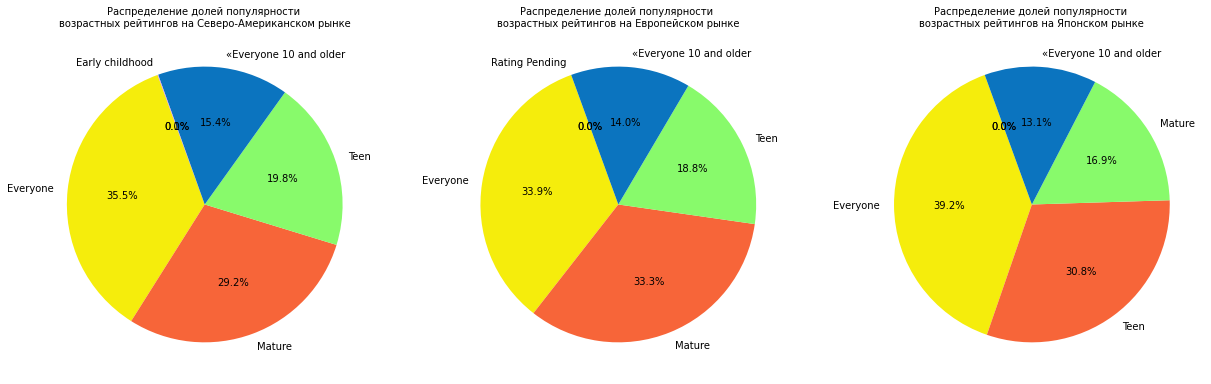

In [42]:
col = 'sales'
dimension = 'возрастных рейтингов'
regions = {'group_na_esrb'
           :'Северо-Американском', 'group_eu_esrb':'Европейском', 'group_jp_esrb':'Японском'}
fig, ax = plt.subplots(1,3, figsize=(21, 7))

for i in range(3):
    get_pie(
        locals().get(list(regions.keys())[i]), 
        col, 
        regions[list(regions.keys())[i]], 
        dimension,
        ax[i]
    )
    ax[i].set_ylabel('')
    ax[i].set_title(f'Распределение долей популярности \n{dimension} на {regions[list(regions.keys())[i]]} рынке', 
                    size=10)

Абсолютный лидер продаж по всем регионам игры с рейтингом "E - Everyone", второе-третье место "M - Mature" и "T - Teen". 
    
Четвертое "E10 - Everyone 10 and older" одинаково для всех.  
Оставшиеся два варианта рейтинга "RP - Rating Pending", "EC - Early childhood" занимают пятое-шестое.  

Можно сделать вывод, что на объем продаж возратной рейтинг оказывает одинаковое влияние на продажи во всех регионах.    

## Проверка гипотез

- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.



    
**Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые**  
    
**H0**: Средние пользовательские рейтинги платформы Xbox One **равны** пользовательским рейтингам платформы PC.     
    
**H1**: Средние пользовательские рейтинги платформы Xbox One **не равны** пользовательским рейтингам платформы PC.    
Данные гипотезы выбраны в качестве нулевой и альтернативной потому что они противоречат друг другу и в случае если отвергается одна из них, другая не отвергается.

In [43]:
data_corr_score = data_corr.loc[data_corr['user_score'] != 0]
user_score_xone = data_corr_score.query('platform == "XOne"')['user_score']
user_score_pc = data_corr_score.query('platform == "PC"')['user_score']

Перед проверкой гипотез проверим распределение и дисперсии выборок:

In [44]:
var_xone = np.var(user_score_xone, ddof=1)
var_pc = np.var(user_score_pc, ddof=1)

In [45]:
print(f'Дисперсии выборок: \n средние пользовательские оценки на XOne {var_xone}\
\n средние пользовательские оценки на PC {var_pc}')

Дисперсии выборок: 
 средние пользовательские оценки на XOne 1.9069968429360695
 средние пользовательские оценки на PC 2.3403339171044952


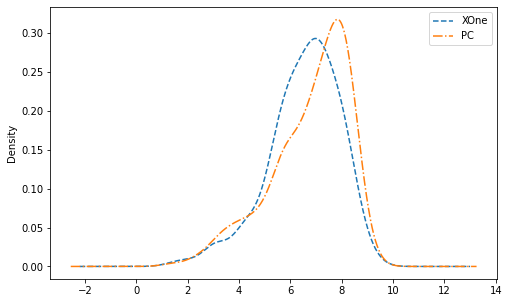

In [46]:
plt.figure(figsize=(8,5))
user_score_xone.plot.density(style='--', label='XOne')
user_score_pc.plot.density(style='-.', label='PC')
plt.legend()
plt.show()

Дисперсии выборок не равны, их распределения близки к нормальным.

In [47]:
alpha = 0.05

results = st.ttest_ind(user_score_xone, user_score_pc, equal_var = False)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.04401892858926169
Отвергаем нулевую гипотезу


Согласно полученному значению p-value (0.04401892858926169) нулевую гипотезу можно отвергнуть -   
    "Средние пользовательские рейтинги платформы Xbox One равны пользовательским рейтингам платформы PC".  
Значение p-value выше критического уровня статистической значимости (установлено для проверки этой гипотезы на уровне 0,05).
Таким образом альтернативная гипотеза " Средние пользовательские рейтинги платформы Xbox One не равны пользовательским рейтингам платформы PC" не будет отвергнута.


   
**Гипотеза: cредние пользовательские рейтинги жанров Action и Sports разные.**  
    
**H0**: Средние пользовательские рейтинги жанра Action **равны** пользовательским рейтингам жанра Sports.     
    
**H1**: Средние пользовательские рейтинги жанра Action **не равны** пользовательским рейтингам жанра Sports.     

In [48]:
user_score_active = data_corr_score.query('genre == "Action"')['user_score']
user_score_sport = data_corr_score.query('genre == "Sports"')['user_score']

Перед проверкой гипотез проверим распределение и дисперсии выборок:

In [49]:
var_xone = np.var(user_score_active, ddof=1)
var_pc = np.var(user_score_sport, ddof=1)

In [50]:
print(f'Дисперсии выборок: \n средние пользовательские оценки жанра Action {var_xone}\
\n средние пользовательские оценки жанра Sports {var_pc}')

Дисперсии выборок: 
 средние пользовательские оценки жанра Action 1.830189395225529
 средние пользовательские оценки жанра Sports 2.814034856727071


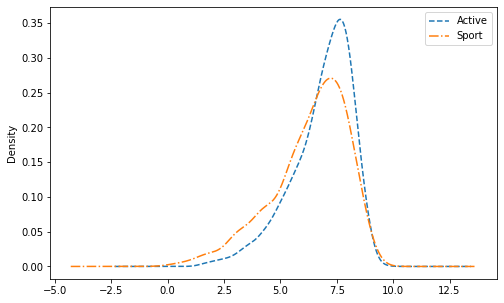

In [51]:
plt.figure(figsize=(8,5))
user_score_active.plot.density(style='--', label='Active')
user_score_sport.plot.density(style='-.', label='Sport')
plt.legend()
plt.show()

Дисперсии выборок не равны, их распределения близки к нормальным.

In [52]:
alpha = 0.05
results = st.ttest_ind(user_score_active, user_score_sport, equal_var = False)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  4.540665510055229e-11
Отвергаем нулевую гипотезу


  
Согласно полученному значению p-value (4.540665510055229e-11) нулевую гипотезу можно отвергнуть -   
    "Средние пользовательские рейтинги жанра Action равны пользовательским рейтингам жанра Sports".  
Значение p-value выше критического уровня статистической значимости (установлено для проверки этой гипотезы на уровне 0,05).
Таким образом альтернативная гипотеза "Средние пользовательские рейтинги жанра Action не равны пользовательским рейтингам жанра Sports" не будет отвергнута.


## Общий вывод

Согласно проведенному иследованию компьютерных игр по платформам, годам выпуска, жанрам, регионам продаж и возрастному рейтингу получены следующие данные:  
- в разрезе платформ наиболее перспективны PS4, XOne т.к. они имеют "запас" жизненного цикла, а также 3DS и PC с учетом размеров выручки;
- по годам выпуска были срезаны данны старше 10 лет, т.к. вероятность повышенного спроса на устаревшие игры невелика;
- по жанрам наиболее прибыльные и при этом продающиеся в больших объемах жанры это Shooter и Action, наименьшие объемы суммарных продаж у Puzzle и Strategy;
- при проведении анализа по регионам существует значительные отличия в предпочтениях платформ:
    - на Северо-Американском и Европейском рынках на первом месте X360, а втором месте Wii и замыкает тройку лидеров PS3
    - Японский рынок возглавляет DS, на втором месте 3DS, на третьем PS3.
- также значительные отличия в зависимости от рынка и по предпочитаемым жанрам:
    - на Северо-Американском и Европейском рынках на первом месте Action, на втором Shooter, на третьем Sports 
    - Японский рынок возглавляет Role-Playing на втором месте Action, на третьем Misc.    
- по возрастному рейтингу отличий по регионам не зафиксировано - максимум продаж по всем регионам игры с рейтингом "E - Everyone", второе-третье место "M - Mature" и "T - Teen"

Были проверены 2 статистические гипотезы:
    - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    - cредние пользовательские рейтинги жанров Action и Sports разные
В результате проведенных расчетов для обеих гипотез были приняты альтернативные гиппотезы, т.к. значение p-value получено выше критического уровня статистической значимости.
    
_"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"_ - альтернативная гипотеза "Средние пользовательские рейтинги платформы Xbox One не равны пользовательским рейтингам платформы PC".  
    
_"Средние пользовательские рейтинги жанров Action и Sports разные"_ - альтернативная гипотеза "Средние пользовательские рейтинги жанра Action не равны пользовательским рейтингам жанра Sports"
